In [1]:
import sys
import os
curr_dir=os.getcwd()

current_dir = os.path.dirname(os.path.abspath(curr_dir))
# parent_dir = os.path.dirname(current_dir)
src_dir = os.path.dirname(current_dir) 
sys.path.append(current_dir) 
sys.path.append(current_dir+'\\src') 



In [2]:


import igraph as ig


In [3]:
import random

# 用 Python 自带的随机数种子间接控制
random.seed(42)

In [4]:
from  graph_diffuse_with_source.graph_diffuse_with_source import Gds as Gds


In [5]:
def normalize_node_data(node_data):
    
    
    total = sum([v[1] for v in node_data])
    if total>0:
        node_data_2=[[k,v/total] for k,v in node_data]
    else:
        node_data_2=[[k,v] for k,v in node_data]

    return node_data_2

In [6]:

# 加载图

random.seed(42)
G = ig.Graph.Barabasi(n=72,m=2)
for i in range(72):
    G.vs[i]['node_id'] = str(i)


# 创建Gds实例，查找中央节点

In [7]:

# 创建Gds实例
gds = Gds(G)
# 添加源节点
source_nodes = [str(v) for v in list(range(0,72))]
gds.add_one_node_ids(source_nodes)


# 执行传播
for _ in range(3):  # 迭代5次
    gds.add_one_node_ids(source_nodes)
    gds.emit_to_buffer()
    gds.merge_from_buffer()


# 计算中心节点
central_nodes = gds.show_central()
print("中心节点:", central_nodes)


中心节点: {'1': 0.04996382008180129, '0': 0.06968207787429738, '2': 0.051367928846717086, '4': 0.046629710247294495, '5': 0.054317972335057904}


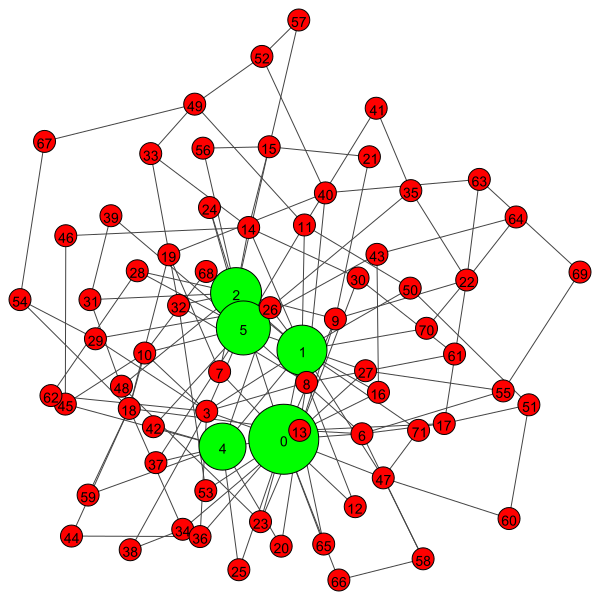

In [8]:

# 可视化
node_data = [(node_id, score) for node_id, score in central_nodes.items()]
node_data=normalize_node_data(node_data)
gds.show_nodes(node_data)
ig.plot(gds.G,vertex_label=gds.G.vs["node_id"])


In [9]:
# 修改种子
random.seed(42)
# 创建Gds实例
gds = Gds(G)
# 添加源节点

selected_nodes = ['15','63']



# 执行传播
for _ in range(6): 
    gds.add_one_node_ids(selected_nodes)
    gds.emit_to_buffer()
    gds.merge_from_buffer()


# 计算中心节点
central_nodes = gds.show_central()
print(selected_nodes,"关联节点:", central_nodes)


['15', '63'] 关联节点: {'0': 0.11764838338680343, '2': 0.06524402186177747, '3': 0.04178311206442765, '4': 0.053305040717560384, '1': 0.08394626465220761, '5': 0.08343743133850241, '15': 0.06143161694859469, '13': 0.04342090561917564, '18': 0.05379240061068707}


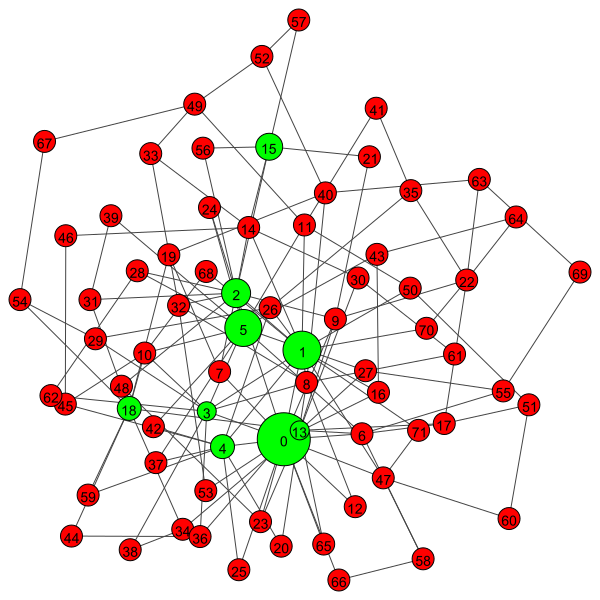

In [10]:

# 可视化
node_data = [(node_id, score) for node_id, score in central_nodes.items()]
node_data=normalize_node_data(node_data)
gds.show_nodes(node_data)
ig.plot(gds.G,vertex_label=gds.G.vs["node_id"])
